In [1]:
import numpy as np
import matplotlib.pyplot as plt

def iris_type(s):
    it = {b'Iris-setosa': 0, b'Iris-versicolor': 1, b'Iris-virginica': 2}
    return it[s]


#读入数据
iris = np.loadtxt("iris.data", delimiter=',', converters={4: iris_type})
np.random.shuffle(iris)  #打乱
num = iris.shape[0]  #数据总数
dim = iris.shape[1] - 1  #维数
training_num = round(num * 4 / 5)  #80%训练、20%测试
test_num = num - training_num
training_set = iris[0:training_num]
test_set = iris[training_num:num]

#单热向量
training_labels = np.zeros((training_num, 3))
test_labels = np.zeros((test_num, 3))

i = 0
for n in training_set[:, -1]:
    training_labels[i, int(n)] = 1
    i += 1

i = 0
for n in test_set[:, -1]:
    test_labels[i, int(n)] = 1
    i += 1

In [2]:
def sigmoid(x):
    # Sigmoid激活函数: 1 / (1 + e^(-x))
    return 1 / (1 + np.exp(-x))


def d_sigmoid(x):
    # sigmoid函数的导数，可化简为 f(x) * (1 - f(x))
    fx = sigmoid(x)
    return fx * (1 - fx)


def mse_loss(real, pred):
    #均方误差损失函数
    return ((real - pred)**2).mean()


class Neural_Network:
    #输入d维向量，中间h个隐含神经元， 输出c>1类单热向量编码
    #隐含层使用sigmoid激活函数，输入输出层使用线性激活函数
    def __init__(self, inpu, hidden, output):
        self.d = inpu
        self.h = hidden
        self.c = output

        # Weights
        self.w1 = np.random.randn(self.d, self.h)
        self.w2 = np.random.randn(self.h, self.c)

        # Biases
        self.b1 = np.random.randn(self.h)
        self.b2 = np.random.randn(self.c)

    def predict(self, x):
        y = sigmoid(np.matmul(x, self.w1) + self.b1)
        z = np.matmul(y, self.w2) + self.b2
        return z

    def Get_error(self, pre, out):
        #测试数据集，计算错误率
        pre = np.argmax(pre, axis=1)  #整理预测出的值
        out = np.argmax(out, axis=1)
        error = 0
        for i in range(out.size):
            if out[i] != pre[i]:
                error += 1

        return error / out.size

    def train(self, train_inputs, train_outputs, test_inputs, test_outputs):
        learn_rate = 0.005
        epochs = 1000
        error_rate1, error_rate2 = [], []
        episodes = []
        loss_value1 = []
        loss_value2 = []

        for e in range(epochs):
            for x, z_real in zip(train_inputs, train_outputs):
                y_ = np.matmul(x, self.w1) + self.b1
                y_pred = sigmoid(y_)

                z_pred = np.matmul(y_pred, self.w2) + self.b2

                # 计算导数
                dL_dzpred = z_pred - z_real  #1,c
                # z层：
                dzpred_dw2 = y_pred  # 1,h
                dzpred_db2 = 1

                # 梯度下降更新参数值
                self.w1 -= learn_rate * x.reshape(
                    -1, 1) * (np.matmul(dL_dzpred, self.w2.T) * d_sigmoid(y_))

                self.b1 -= learn_rate * np.matmul(dL_dzpred,
                                                  self.w2.T) * d_sigmoid(y_)

                self.w2 -= learn_rate * dzpred_dw2.reshape(-1, 1) * dL_dzpred
                self.b2 -= learn_rate * dL_dzpred * dzpred_db2

            # 计算损失函数值
            if e % 10 == 0:
                episodes.append(e)

                train_preds = np.apply_along_axis(self.predict, 1,
                                                  train_inputs)
                test_preds = np.apply_along_axis(self.predict, 1, test_inputs)
                loss1 = mse_loss(train_outputs, train_preds)
                loss_value1.append(loss1)
                loss2 = mse_loss(test_outputs, test_preds)
                loss_value2.append(loss2)
                #  print("Times: %d ,loss: %.3f" % (e, loss))

                error_rate1.append(self.Get_error(train_outputs, train_preds))
                rate2 = self.Get_error(test_outputs, test_preds)
                error_rate2.append(rate2)

                plt.figure(1)
                plt.title("Loss function value of training data")
                plt.xlabel("training times")
                plt.ylabel("loss function value")
                plt.plot(episodes, loss_value1, 'r')

                plt.figure(2)
                plt.title("Loss function value of test data")
                plt.xlabel("training times")
                plt.ylabel("loss function value")
                plt.plot(episodes, loss_value2, 'b')

                plt.figure(3)
                plt.title("Error rate of training data")
                plt.xlabel("training times")
                plt.ylabel("error rate")
                plt.plot(episodes, error_rate1, 'c')

                plt.figure(4)
                plt.title("Error rate of test data")
                plt.xlabel("training times")
                plt.ylabel("error rate")
                plt.plot(episodes, error_rate2, 'g')

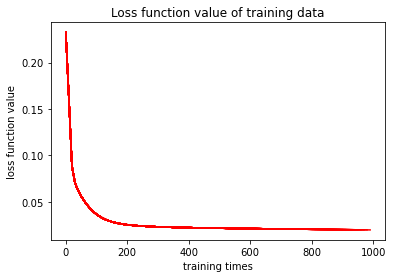

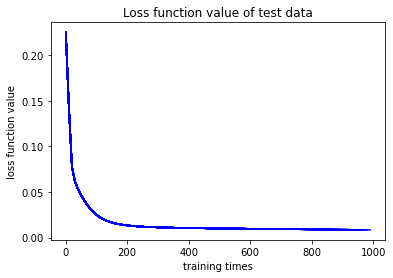

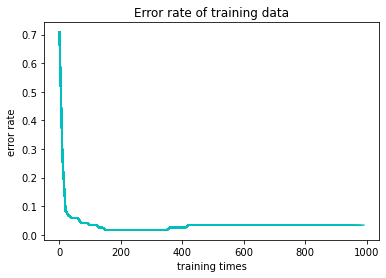

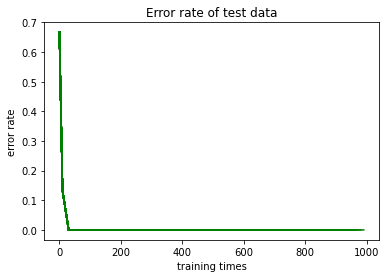

In [3]:
network = Neural_Network(4, 10, 3)
network.train(training_set[:, :-1], training_labels,test_set[:, :-1], test_labels)